In [1]:
# Import Libraries

import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt


In [2]:
# Load stereo images

img_left = cv2.imread('/home/planck/Ravi_Saxena/Python_Codes/CV/Ass_CV/Data_1/DATA_2/bikeL.png', 0)  # Load as grayscale
img_right = cv2.imread('/home/planck/Ravi_Saxena/Python_Codes/CV/Ass_CV/Data_1/DATA_2/bikeR.png', 0)


In [3]:
# Load intrinsic matrices

cam0=([[5299.313, 0, 1263.818], [0, 5299.313 ,977.763],[ 0, 0, 1]])
cam1=([[5299.313, 0, 1438.004],[ 0, 5299.313, 977.763],[ 0, 0, 1]])

intrinsic_left = np.array(cam0)
intrinsic_right = np.array(cam1)

In [4]:
# Convert images to PyTorch tensors

img_left_tensor = torch.from_numpy(img_left.astype(np.float32)).unsqueeze(0).unsqueeze(0)
img_right_tensor = torch.from_numpy(img_right.astype(np.float32)).unsqueeze(0).unsqueeze(0)
img_left_tensor=img_left_tensor/255
img_right_tensor=img_right_tensor/255
# Stereo matching (Block Matching)
stereo = cv2.StereoBM_create(numDisparities=128, blockSize=5)
disparity = stereo.compute(img_left, img_right)

In [ ]:
# Load camera intrinsic matrices
cam0=([[5299.313, 0, 1263.818], [0, 5299.313 ,977.763],[ 0, 0, 1]])
cam1=([[5299.313, 0, 1438.004],[ 0, 5299.313, 977.763],[ 0, 0, 1]])
K_left = np.array(cam0)
K_right = np.array(cam1)

In [5]:
# Convert disparity to depth map

baseline=177.288 # Example baseline (distance between the two cameras)
focal_length = intrinsic_left[0, 0]  # Focal length from intrinsic matrix
depth_map = (focal_length * baseline) / disparity

/tmp/ipykernel_19657/2450576008.py:5: RuntimeWarning: divide by zero encountered in divide
  depth_map = (focal_length * baseline) / disparity


In [6]:
# Generate 3D point cloud

height, width = img_left.shape
y, x = np.meshgrid(range(height), range(width), indexing='ij')
points_3d = np.stack([(x - intrinsic_left[0, 2]) * depth_map / focal_length,
                       (y - intrinsic_left[1, 2]) * depth_map / focal_length,
                       depth_map], axis=-1)


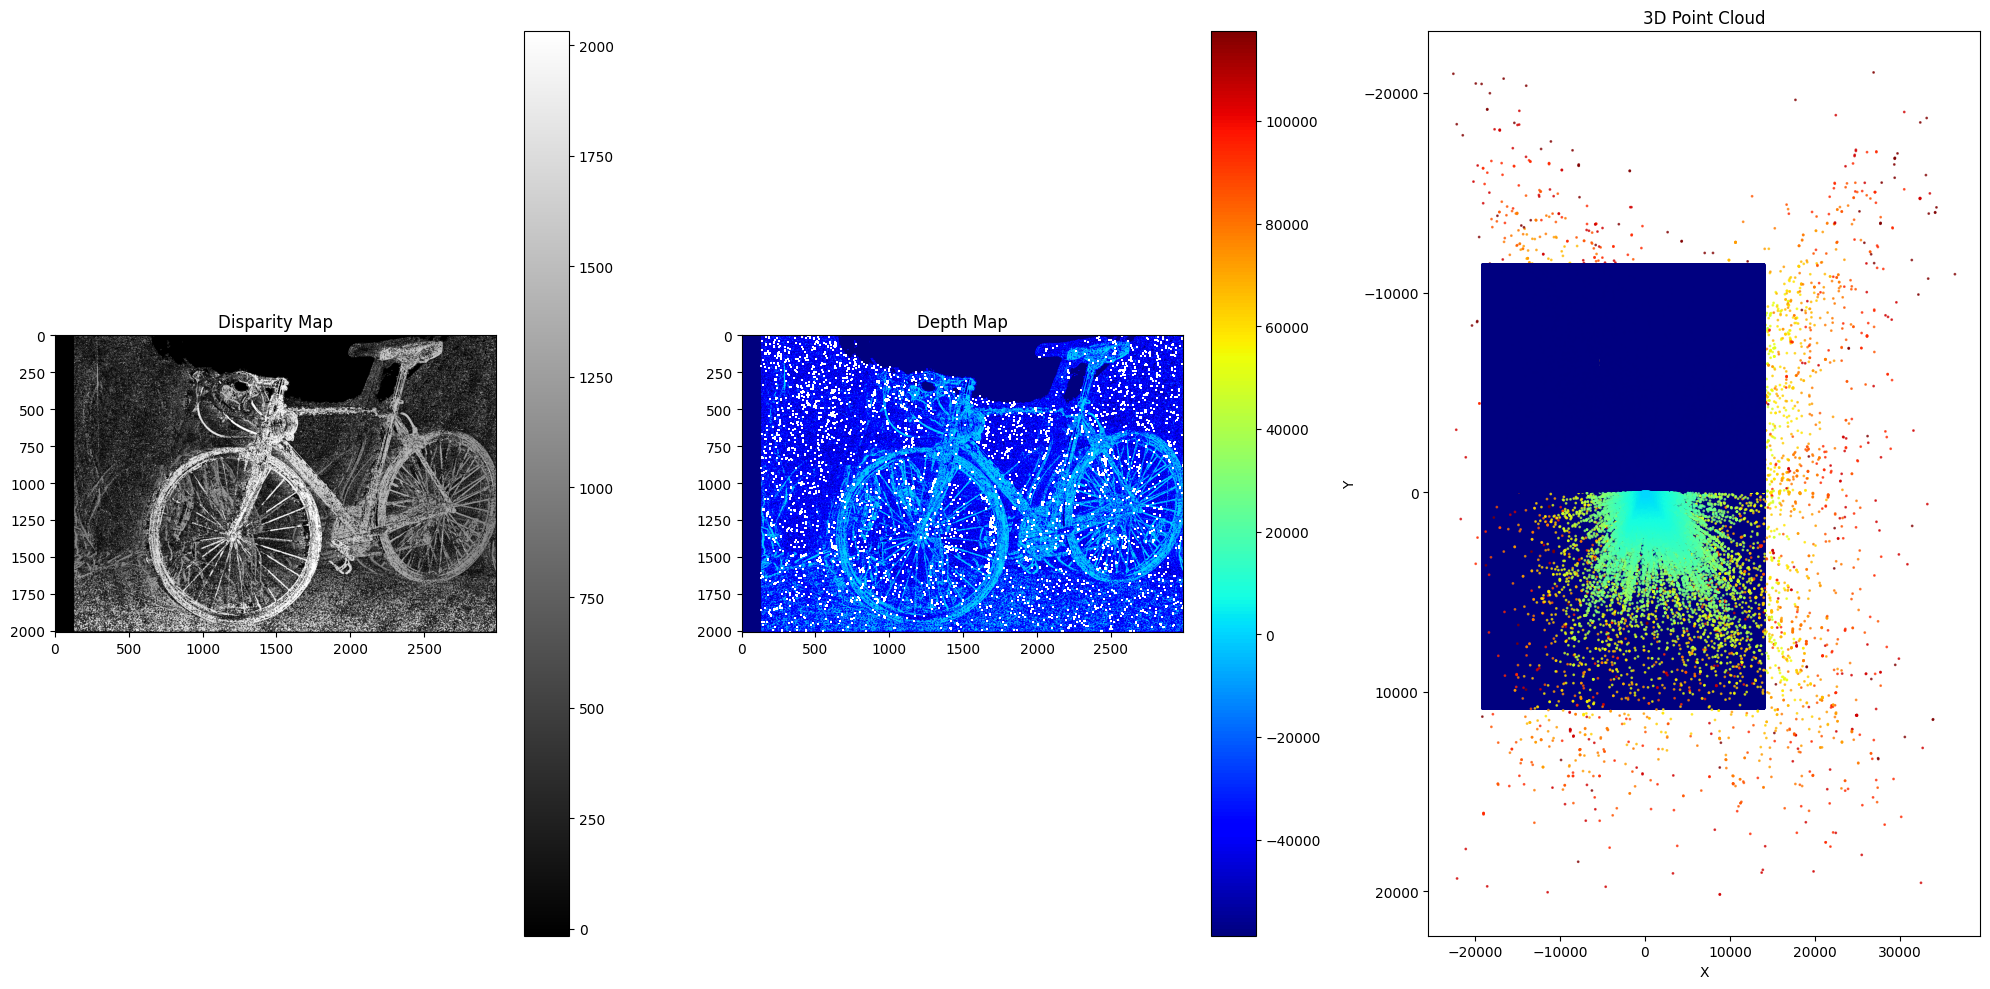

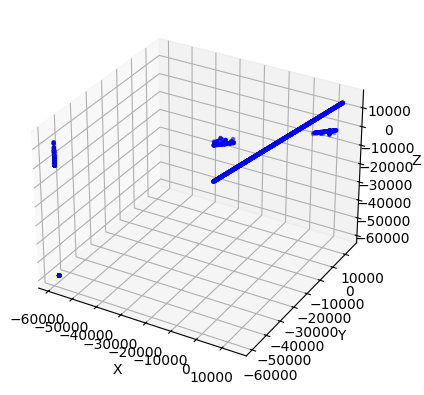

In [7]:
# Visualize results

plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.imshow(disparity, cmap='gray')
plt.colorbar()
plt.title('Disparity Map')

plt.subplot(132)
plt.imshow(depth_map, cmap='jet')
plt.colorbar()
plt.title('Depth Map')

plt.subplot(133)
plt.scatter(points_3d[..., 0], points_3d[..., 1], s=1, c=points_3d[..., 2], cmap='jet',alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Point Cloud')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d[0], points_3d[1], points_3d[2], c='b', marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()